In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_csv('../lab-eda-univariate/amz_uk_price_prediction_dataset.csv')

In [3]:
df.head(3)

,uid,asin,title,stars,reviews,price,isBestSeller,boughtInLastMonth,category
0,1,B09B96TG33,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
1,2,B01HTH3C8S,"Anker Soundcore mini, Super-Portable Bluetooth...",4.7,98099,23.99,True,0,Hi-Fi Speakers
2,3,B09B8YWXDF,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers


## Part 1: Analyzing Best-Seller Trends Across Product Categories

**Objective:** Understand the relationship between product categories and their best-seller status.

**1. Crosstab Analysis:**

 - Create a crosstab between the product 'category' and the 'isBestSeller' status.

 - Are there categories where being a best-seller is more prevalent?

    Hint: one option is to calculate the proportion of best-sellers for each category and then sort the categories based on this proportion in descending order.

In [4]:
crosstab_data = pd.crosstab(df['category'], df['isBestSeller'])

In [5]:
crosstab_data

isBestSeller,False,True
category,,
3D Printers,247,1
3D Printing & Scanning,4065,2
Abrasive & Finishing Products,245,5
Action Cameras,1696,1
Adapters,251,3
...,...,...
Wind Instruments,243,7
Window Treatments,234,5
Women,17559,213


In [6]:
crosstab_data['proportion'] = (crosstab_data[True]/(crosstab_data[False] + crosstab_data[True]))*100

In [7]:
#proportion = df.groupby('category')['isBestSeller'].mean().sort_values(ascending=False)

In [8]:
crosstab_data.sort_values('proportion',ascending=False)

isBestSeller,False,True,proportion
category,,,
Grocery,9008,556,5.813467
Smart Home Security & Lighting,98,6,5.769231
Health & Personal Care,9017,552,5.768628
Mobile Phone Accessories,248,11,4.247104
Power & Hand Tools,8353,306,3.533895
...,...,...,...
"CD, Disc & Tape Players",8798,0,0.000000
General Music-Making Accessories,259,0,0.000000
Snowboard Boots,1449,0,0.000000


In [9]:
print(f"Categories where being a best-seller is more prevalent are: {list((crosstab_data.sort_values('proportion',ascending=False)).head(5).index)} ")

Categories where being a best-seller is more prevalent are: ['Grocery', 'Smart Home Security & Lighting', 'Health & Personal Care', 'Mobile Phone Accessories', 'Power & Hand Tools'] 


**2. Statistical Tests:**

- Conduct a Chi-square test to determine if the best-seller distribution is independent of the product category.
 - Compute Cramér's V to understand the strength of association between best-seller status and category.

In [10]:
selected_columns = crosstab_data.drop('proportion', axis=1)

In [11]:
from scipy.stats import chi2_contingency

chi2, p_value, dof, expected = chi2_contingency(selected_columns)

print(f"Chi-square statistic: {chi2}")
print(f"P-value: {p_value}")
print(f"Degrees of freedom: {dof}")
#print("Expected frequencies table:")
#print(expected)


Chi-square statistic: 36540.20270061387
P-value: 0.0
Degrees of freedom: 295


- p-value equal to 0 indicates that there is a correlation between data

In [12]:
from scipy.stats.contingency import association

# Computing the association between variables in 'crosstab_result' using the "cramer" method
a = association(selected_columns, method="cramer")

print(f"Cramér's V association between best-seller status and category : {a}")

Cramér's V association between best-seller status and category : 0.1222829439760564


-  the value of Cramér's V association is bout 0.12 which implies rather weak correlation between data

**3. Visualizations:**

 - Visualize the relationship between product categories and the best-seller status using a stacked bar chart.

In [13]:
crosstab_data.sort_values(True,ascending=False).iloc[0:7]

isBestSeller,False,True,proportion
category,,,
Grocery,9008,556,5.813467
Health & Personal Care,9017,552,5.768628
Baby,14709,341,2.265781
Sports & Outdoors,835935,330,0.039461
Power & Hand Tools,8353,306,3.533895
Beauty,19010,302,1.563795
Pet Supplies,9152,285,3.020028


In [14]:
# Plotting a stacked bar chart for the 'crosstab_result' data
#subset = selected_columns.sort_values(True,ascending=False).iloc[0:7]

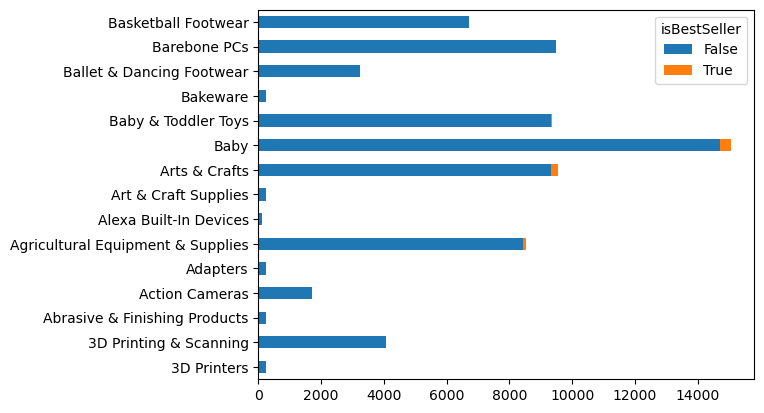

In [15]:
ax = selected_columns.iloc[0:15].plot(kind="barh", stacked=True) 
ax.set_ylabel('')
plt.show()

## Part 2: Exploring Product Prices and Ratings Across Categories and Brands
**Objective:** Investigate how different product categories influence product prices.




**0. Preliminary Step: Remove outliers in product prices.**

For this purpose, we can use the IQR (Interquartile Range) method. Products priced below the first quartile minus 1.5 times the IQR or above the third quartile plus 1.5 times the IQR will be considered outliers and removed from the dataset. The next steps will be done with the dataframe without outliers.

Hint: you can check the last Check For Understanding at the end of the lesson EDA Bivariate Analysis for a hint on how to do this.

In [16]:
Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)
IQR = Q3 - Q1

IQR

36.0

In [17]:
lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR

In [18]:
lower, upper

(-44.01, 99.99000000000001)

In [19]:
df_filter = df[(df['price'] >= lower) & (df['price'] <= upper)]

In [20]:
df_filter.head(2)

,uid,asin,title,stars,reviews,price,isBestSeller,boughtInLastMonth,category
0,1,B09B96TG33,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
1,2,B01HTH3C8S,"Anker Soundcore mini, Super-Portable Bluetooth...",4.7,98099,23.99,True,0,Hi-Fi Speakers


**1. Violin Plots:**

- Use a violin plot to visualize the distribution of 'price' across different product 'categories'. Filter out the top 20 categories based on count for better visualization.
 - Which product category tends to have the highest median price? Don't filter here by top categories.


In [21]:
# Filter top 10 categories - with 20 the plot is not very clear

cat_list = df_filter['category'].value_counts().head(10).index

Text(0, 0.5, '')

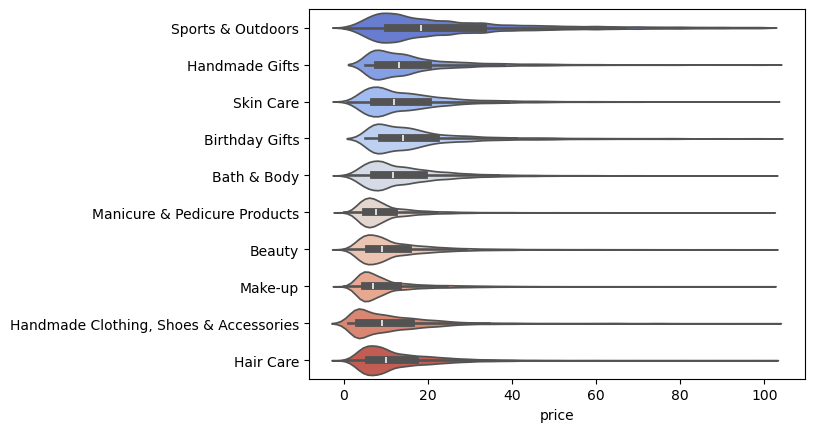

In [22]:
#plt.figure(figsize=(10, 10))
sns.violinplot(data=df_filter[df_filter['category'].isin(cat_list)], x='price', y='category', hue='category', legend=False, palette="coolwarm")
plt.ylabel('')

- The highest median price is for products from 'Sports & Outdoors' category

In [23]:
# df_filter[df_filter['category'].isin(cat_list)].groupby('category')['price'].median().sort_values(ascending=False)

In [18]:
# df_filter[df_filter['category'].isin(cat_list)].groupby('category')['price'].mean().sort_values(ascending=False)

**2. Bar Charts:**

- Create a bar chart comparing the average price of products for the top 10 product categories (based on count).
- Which product category commands the highest average price? Don't filter here by top categories.


[Text(0.5, 1.0, ''), Text(0.5, 0, ''), Text(0, 0.5, '')]

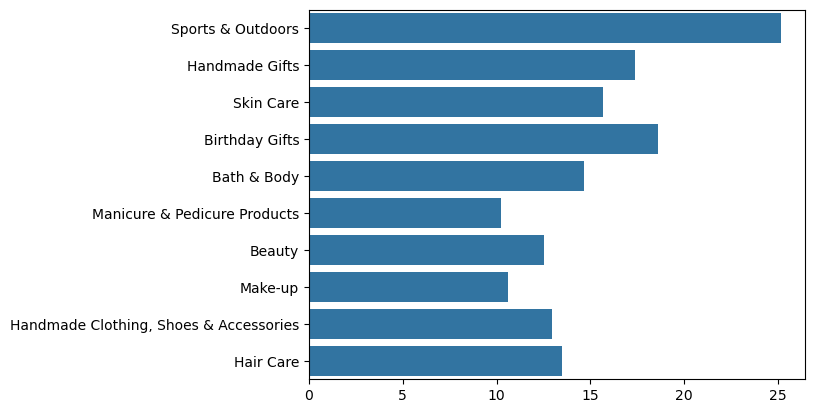

In [20]:
ax = sns.barplot(data=df_filter[df_filter['category'].isin(cat_list)], y='category' , x='price', estimator='mean', errorbar=None)
ax.set(title='', xlabel='', ylabel='')

- The highest average price is in products from 'Sport & Outdoors' category

**3. Box Plots:**

 - Visualize the distribution of product 'ratings' based on their 'category' using side-by-side box plots. Filter out the top 10 categories based on count for better visualization.
- Which category tends to receive the highest median rating from customers? Don't filter here by top categories.

In [27]:
# sns.boxplot(data=df_filter[df_filter['category'].isin(cat_list)], y='category', x='stars')
# plt.ylabel('')

Text(0, 0.5, '')

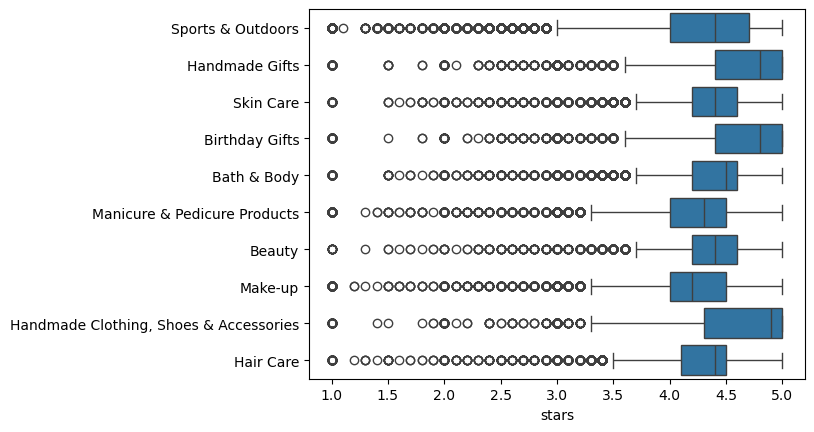

In [25]:
# The stars with value = 0 were not included in the plot 

sns.boxplot(data=df_filter[(df_filter['category'].isin(cat_list)) &(df_filter['stars'] > 0)], y='category', x='stars')
plt.ylabel('')

- The highest median rating is recived by 'Handmade clothing, Shoes & Accessories'. Just after are 'Birthday Gifts' and 'Handmade Gifts'

## Part 3: Investigating the Interplay Between Product Prices and Ratings
**Objective:** Analyze how product ratings (stars) correlate with product prices.

**1. Correlation Coefficients:**

 - Calculate the correlation coefficient between 'price' and 'stars'.
 - Is there a significant correlation between product price and its rating?


In [24]:
corr_coeff = df_filter['price'].corr(df_filter['stars'], method='pearson')
corr_coeff_without_zero_star = df_filter['stars'][df['stars'] > 0].corr(df_filter['price'], method='pearson')

In [25]:
print("Correlation coefficient between product 'price' and 'stars':")
print(f" - wiht '0' starts: {corr_coeff}")
print(f" - wihtout '0' starts: {corr_coeff_without_zero_star}")

Correlation coefficient between product 'price' and 'stars':
 - wiht '0' starts: -0.0776729987818137
 - wihtout '0' starts: 0.0067445080671580315


- The correlation coefficient between 'price' and 'stars' changes when we include or not '0' stars,
- Assuming that '0' means no rating, we can consider correlation between 'stars' bigger than zero and 'prices',
- The value of correlation coefficient (without '0' starts) is only about 0.007 which indicates very week positive correlation or rather practically no correlation between price and rating

**2. Visualizations:**

- Use a scatter plot to visualize the relationship between product rating and price. What patterns can you observe?

C:\Users\Benia\AppData\Local\Temp\ipykernel_3712\3541241216.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  filter_stars = df_filter[df['stars']>0].reset_index(drop=True)


<Axes: xlabel='stars', ylabel='price'>

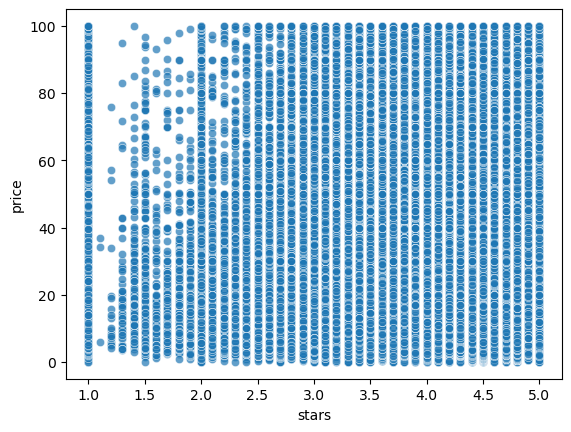

In [26]:
# exclude 'stars' values with zero - assuming these are people who didn't leave the note 
filter_stars = df_filter[df['stars']>0].reset_index(drop=True)
sns.scatterplot(data=filter_stars, x='stars', y='price',alpha=0.7)

- There isn't any pattern, there is no clear correlation between product price and its rating (whis agrees with almost negligible value of correlation coefficient calculated before)

- Use a correlation heatmap to visualize correlations between all numerical variables.

In [27]:
corr_matrix = filter_stars.select_dtypes('number').corr()

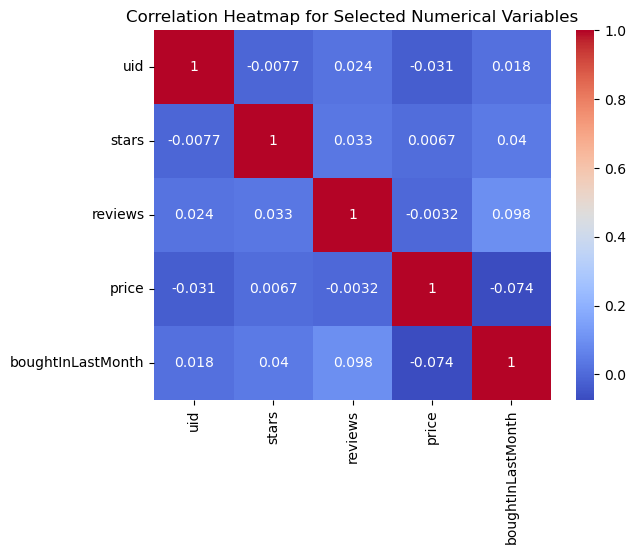

In [28]:
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap for Selected Numerical Variables")
plt.show()

- Examine if product prices typically follow a normal distribution using a QQ plot.

In [ ]:
import statsmodels.api as sm

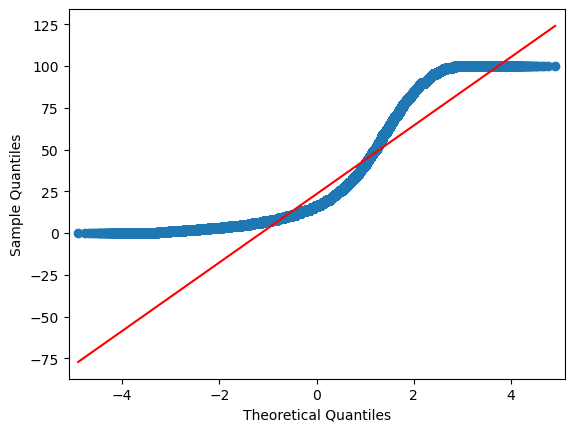

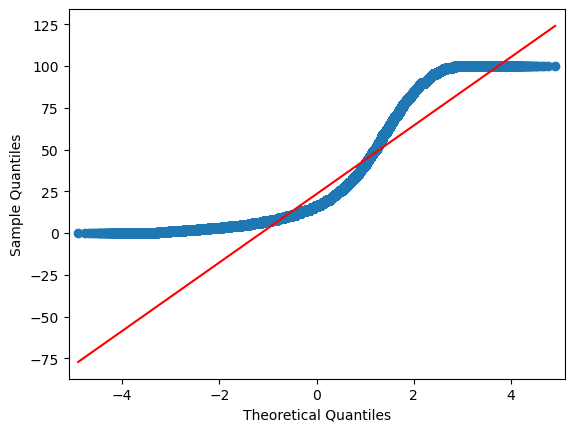

In [31]:
sm.qqplot(data=df_filter['price'], line='s')

- QQplot shows that product prices do not follow normal distribution